In [1]:
!pip install --quiet nltk
!pip install --quiet bs4
!pip install --quiet tqdm

In [2]:
import pandas as pd
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from tqdm import tqdm

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/ucloud/nltk_data...


True

## Loading in the data and preprocessing

In [14]:
# Define the file paths
file_paths = [
    'C:/Users/Mads/Documents/NLP/cnn_dailymail/3.0.0/train-00000-of-00003.parquet',
    'C:/Users/Mads/Documents/NLP/cnn_dailymail/3.0.0/train-00001-of-00003.parquet',
    'C:/Users/Mads/Documents/NLP/cnn_dailymail/3.0.0/train-00002-of-00003.parquet',
]

# Load and concatenate the Parquet files
train_df_list = [pd.read_parquet(file) for file in file_paths]
train_df = pd.concat(train_df_list, ignore_index=True)

# Randomly sample 150,000 rows
sampled_df = train_df.sample(n=1000, random_state=1)

# Display the shape and the first few rows of the sampled DataFrame
print(sampled_df.shape)
print(sampled_df.head())


(1000, 3)
                                                  article  \
121639  By . Daily Mail Reporter . PUBLISHED: . 07:34 ...   
188289  By . Lizzie Parry for MailOnline . A young can...   
75440   Rebels aided by al Qaeda-linked militants seiz...   
49582   (CNN) -- Two rights groups launched a stinging...   
50612   (CNN) -- Puffing on electronic cigarettes is a...   

                                               highlights  \
121639  President Barack Obama's top national security...   
188289  Sophie Walton was diagnosed with bone cancer i...   
75440   The Israeli military has closed off the area a...   
49582   NEW: Trial resumes of Kremlin critic Aleksei N...   
50612   Government proposes to explicitly ban the use ...   

                                              id  
121639  1211a23db42e7dd52a43e564a899ebbf1b2d1251  
188289  aff92aa2fc6e294efeeed70e9b0a0aefac32b030  
75440   bb7757b7bf3d90ec4f1d1915a4699eecafc25d1a  
49582   8f25b2c54cb563b98e1f2619401df7137a3f0c77  
5

In [15]:
sampled_df.to_csv('sampled_df.csv', index=False)

In [21]:
lemmatizer = WordNetLemmatizer()

file_path = 'data.csv'
df = pd.read_csv(file_path)

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stop words and lemmatize
    cleaned_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    
    return cleaned_text

# Apply the cleaning function with progress bars
tqdm.pandas()

In [22]:
# Apply the cleaning function to both the 'article' and 'highlights' columns
df['cleaned_article'] = df['article'].progress_apply(clean_text)

100%|██████████| 150000/150000 [08:42<00:00, 287.04it/s]


In [23]:
df['cleaned_highlights'] = df['highlights'].progress_apply(clean_text)

  0%|          | 0/150000 [00:00<?, ?it/s]C:\Users\Mads\AppData\Local\Temp\ipykernel_11968\3075676461.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
100%|██████████| 150000/150000 [01:09<00:00, 2144.44it/s]


In [29]:
cleaned_file_path = 'cleaned_data.csv'

In [28]:
df.to_csv(cleaned_file_path, index=False)

## Loading in our preprocessed df

ubuntu commands required to load in the file uploaded to github using the large file system.
sudo apt-get update
sudo apt-get install git-lfs
git lfs install
git lfs pull


In [4]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,id,cleaned_article,cleaned_highlights
0,1211a23db42e7dd52a43e564a899ebbf1b2d1251,daily mail reporter published est june updated...,president barack obamas top national security ...
1,aff92aa2fc6e294efeeed70e9b0a0aefac32b030,lizzie parry mailonline young cancer victim to...,sophie walton diagnosed bone cancer discoverin...
2,bb7757b7bf3d90ec4f1d1915a4699eecafc25d1a,rebel aided al qaedalinked militant seized con...,israeli military closed area around crossing o...
3,8f25b2c54cb563b98e1f2619401df7137a3f0c77,cnn two right group launched stinging critique...,new trial resume kremlin critic aleksei navaln...
4,daa6ca8fe860fa70bed00e2bfd05ab7414b7cb0e,cnn puffing electronic cigarette already nono ...,government proposes explicitly ban use electro...


In [5]:
!pip install --quiet tensorflow

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
max(len(sequences) for sequences in df.cleaned_article)

13408

In [65]:
# Tokenizer
tokenizer_article = Tokenizer(num_words = 10000, oov_token='<OOV>')
tokenizer_article.fit_on_texts(df.cleaned_article)

tokenizer_summary = Tokenizer(num_words = 10000, oov_token='<OOV>')
tokenizer_summary.fit_on_texts(df.cleaned_highlights)

tokenized_article = tokenizer_article.texts_to_sequences(df.cleaned_article)
tokenized_summary = tokenizer_summary.texts_to_sequences(df.cleaned_highlights)

### Potential outlier detection

In [66]:
max_article_len = max(len(sequence) for sequence in tokenized_article)
max_summary_len = max(len(sequence) for sequence in tokenized_summary)

print(max_article_len, max_summary_len)

1828 717


/tmp/ipykernel_240/844912644.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Article Length', data=lengths_df, palette='Set2')
/tmp/ipykernel_240/844912644.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Summary Length', data=lengths_df, palette='Set2')


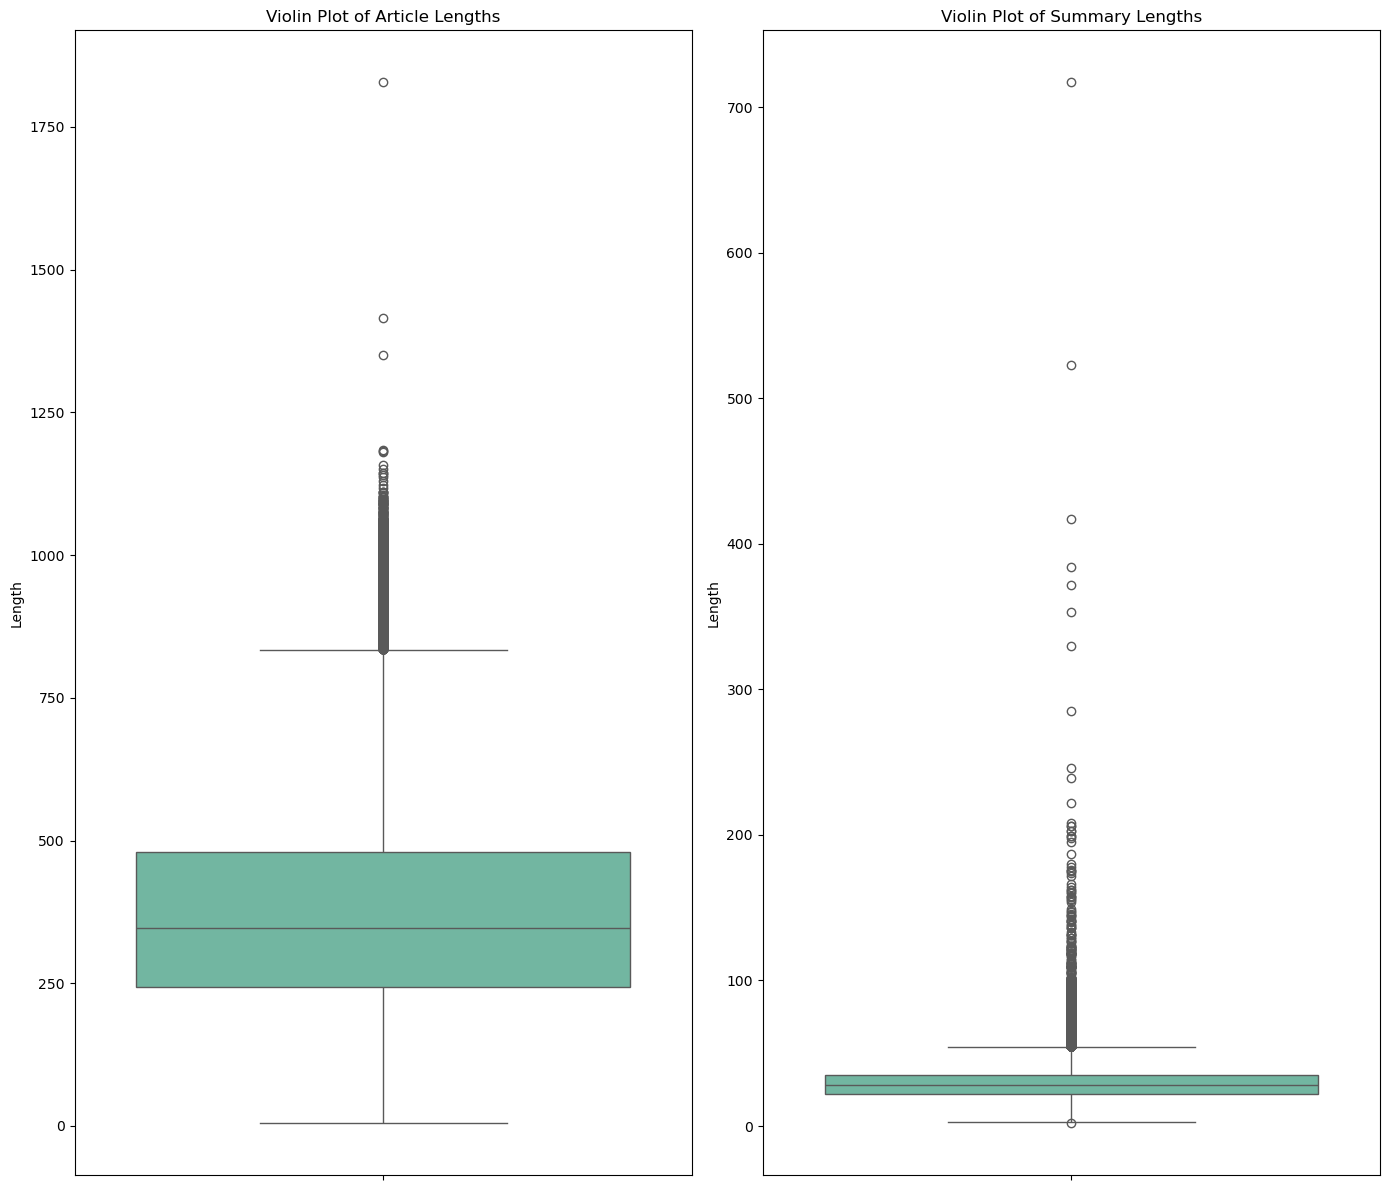

In [67]:
import matplotlib.pyplot as plt
!pip install --quiet seaborn
import seaborn as sns

article_lengths = [len(sequence) for sequence in tokenized_article]
summary_lengths = [len(sequence) for sequence in tokenized_summary]

# Create a DataFrame for plotting
lengths_df = pd.DataFrame({
    'Article Length': article_lengths,
    'Summary Length': summary_lengths
})

# Melt the DataFrame to a long format
lengths_df_melted = lengths_df.melt(var_name='Type', value_name='Length')

# Plot violin plots using Seaborn
plt.figure(figsize=(14, 12))

# Violin plot for Article Lengths
plt.subplot(1, 2, 1)
sns.boxplot(y='Article Length', data=lengths_df, palette='Set2')
plt.title('Violin Plot of Article Lengths')
plt.xlabel('')
plt.ylabel('Length')

# Violin plot for Summary Lengths
plt.subplot(1, 2, 2)
sns.boxplot(y='Summary Length', data=lengths_df, palette='Set2')
plt.title('Violin Plot of Summary Lengths')
plt.xlabel('')
plt.ylabel('Length')

plt.tight_layout()
plt.show()

In [68]:
#removing outliers:
# Identify indices of summaries longer than 150 tokens
indices_to_remove = [i for i, length in enumerate(summary_lengths) if length > 150]
print("Instances remove: ", len(indices_to_remove))

# Remove the corresponding articles and summaries
filtered_articles = [article for i, article in enumerate(tokenized_article) if i not in indices_to_remove]
filtered_summaries = [summary for i, summary in enumerate(tokenized_summary) if i not in indices_to_remove]


Instances remove:  40


In [71]:
article_lengths = [len(sequence) for sequence in filtered_articles]
summary_lengths = [len(sequence) for sequence in filtered_summaries]
#indetify indices of articles longer than 1200 tokens
indices_to_remove = [i for i, length in enumerate(article_lengths) if length > 1200]
print("Instances removed: ", len(indices_to_remove))

# remove the corresponding articles and summaries
filtered_articles = [article for i, article in enumerate(filtered_articles) if i not in indices_to_remove]
filtered_summaries = [summary for i, summary in enumerate(filtered_summaries) if i not in indices_to_remove]

Instances removed:  3


In [72]:
print(len(filtered_articles), len(filtered_summaries))

149957 149957


## Padding to ensure that our text-sequences are of the same length

1184 149


/tmp/ipykernel_240/3070405093.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Article Length', data=new_lengths_df, palette='Set2')
/tmp/ipykernel_240/3070405093.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Summary Length', data=new_lengths_df, palette='Set2')


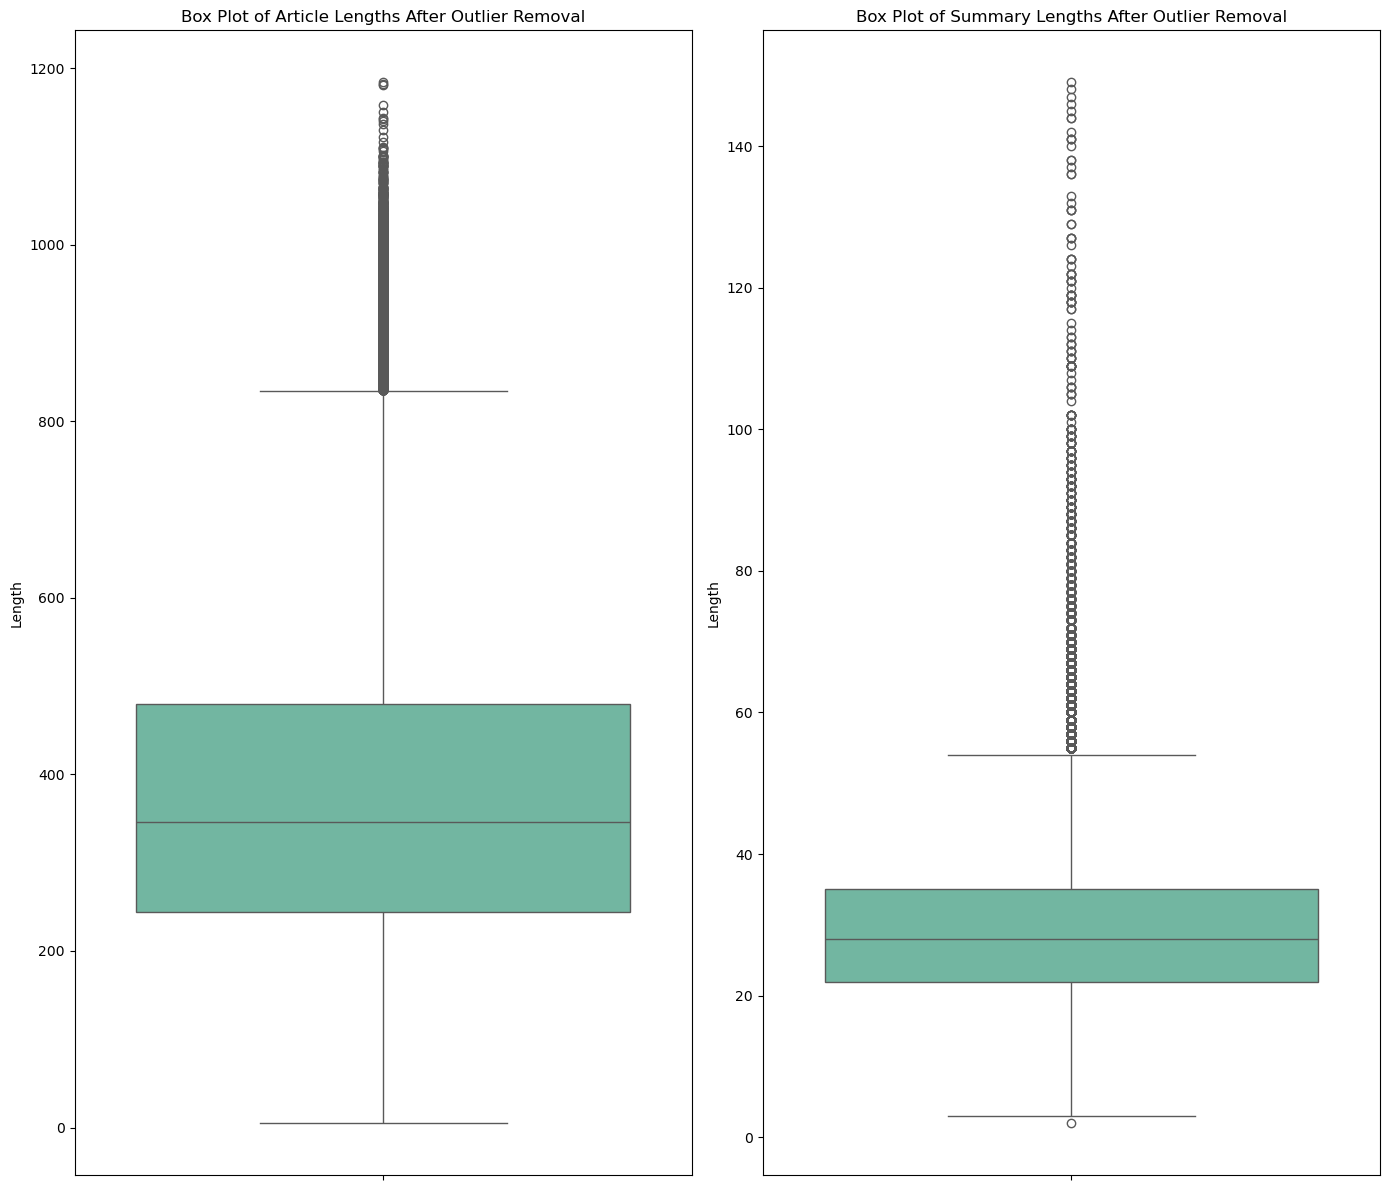

In [74]:
max_article_len = max(len(sequence) for sequence in filtered_articles)
max_summary_len = max(len(sequence) for sequence in filtered_summaries)

print(max_article_len, max_summary_len)

# Plot new distributions
new_article_lengths = [len(sequence) for sequence in filtered_articles]
new_summary_lengths = [len(sequence) for sequence in filtered_summaries]

# Create a new DataFrame for plotting
new_lengths_df = pd.DataFrame({
    'Article Length': new_article_lengths,
    'Summary Length': new_summary_lengths
})

# Plot new box plots
plt.figure(figsize=(14, 12))

# Box plot for new Article Lengths
plt.subplot(1, 2, 1)
sns.boxplot(y='Article Length', data=new_lengths_df, palette='Set2')
plt.title('Box Plot of Article Lengths After Outlier Removal')
plt.xlabel('')
plt.ylabel('Length')

# Box plot for new Summary Lengths
plt.subplot(1, 2, 2)
sns.boxplot(y='Summary Length', data=new_lengths_df, palette='Set2')
plt.title('Box Plot of Summary Lengths After Outlier Removal')
plt.xlabel('')
plt.ylabel('Length')

plt.tight_layout()
plt.show()

In [75]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_article_sequences = pad_sequences(filtered_articles, max_article_len, padding='post', truncating='post')
padded_summary_sequences = pad_sequences(filtered_summaries, max_summary_len, padding = 'post', truncating = 'post')

## Building our network

In [85]:
!pip install --quiet keras-tuner

In [86]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    # Encoder
    encoder_inputs = Input(shape=(max_article_len,))
    encoder_embedding = Embedding(input_dim=10000, output_dim=hp.Int('embedding_dim', min_value=100, max_value=300, step=50))(encoder_inputs)
    encoder_lstm = LSTM(units=hp.Int('encoder_lstm_units', min_value=50, max_value=200, step=50), return_state=True, 
                       dropout=hp.Float('encoder_dropout', 0.0, 0.5, step=0.1))
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=(None,))
    decoder_embedding = Embedding(input_dim=10000, output_dim=hp.Int('embedding_dim', min_value=100, max_value=300, step=50))(decoder_inputs)
    decoder_lstm = LSTM(units=hp.Int('decoder_lstm_units', min_value=50, max_value=200, step=50), return_sequences=True, return_state=True,
                       dropout=hp.Float('encoder_dropout', 0.0, 0.5, step=0.1))
    decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
    decoder_dense = Dense(vocab_size, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    
    # Compile the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [93]:
# Create decoder input sequences by right-shifting the padded summary sequences
!pip install --quiet scikit-learn
from sklearn.model_selection import train_test_split
# Create decoder input sequences by right-shifting the padded summary sequences
decoder_input_sequences = np.zeros_like(padded_summary_sequences)
decoder_input_sequences[:, 1:] = padded_summary_sequences[:, :-1]
decoder_input_sequences[:, 0] = 0  # Use padding token (0) as the start token

labels = padded_summary_sequences

# Combine encoder inputs, decoder inputs, and labels for consistent splitting
data_combined = list(zip(padded_article_sequences, decoder_input_sequences))
labels_combined = labels

# Split the data
X_train_combined, X_val_combined, y_train, y_val = train_test_split(data_combined, labels_combined, test_size=0.2, random_state=42)

# Separate encoder and decoder inputs after splitting
X_train_encoder, X_train_decoder = zip(*X_train_combined)
X_val_encoder, X_val_decoder = zip(*X_val_combined)

# Convert tuples back to numpy arrays
X_train_encoder = np.array(X_train_encoder)
X_train_decoder = np.array(X_train_decoder)
X_val_encoder = np.array(X_val_encoder)
X_val_decoder = np.array(X_val_decoder)


In [102]:
!pip install scipy scikit-learn keras-tuner
!pip install keras-tuner[bayesian]

In [101]:
# Define the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # Increase trials to explore more combinations
    executions_per_trial=2,
    directory='my_dir',
    project_name='article_summary_tuning'
)

# Setup TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Run the tuner
tuner.search([X_train_encoder, X_train_decoder], y_train, epochs=10, validation_data=([X_val_encoder, X_val_decoder], y_val), callbacks=[tensorboard_callback])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"""
The optimal number of units in the encoder LSTM layer is {best_hps.get('encoder_lstm_units')} and 
in the decoder LSTM layer is {best_hps.get('decoder_lstm_units')}. The optimal embedding dimension is {best_hps.get('embedding_dim')}, 
the optimal encoder dropout rate is {best_hps.get('encoder_dropout')}, the optimal decoder dropout rate is {best_hps.get('decoder_dropout')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Setup TensorBoard for the final model training
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "_final"
tensorboard_callback_final = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with the optimal hyperparameters
history = model.fit([X_train_encoder, X_train_decoder], y_train, epochs=10, validation_data=([X_val_encoder, X_val_decoder], y_val), callbacks=[tensorboard_callback_final])


ImportError: Please install scipy before using the `BayesianOptimization` with `pip install keras-tuner[bayesian]`.